# Data Inspection Notebook
# 
# Phase: Data Understanding 
# 
### **Objective:** Inspect the scraped data, understand its structure, and prepare for preprocessing.

### 1. Setup and Imports

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import os
import re
from langdetect import detect, DetectorFactory, LangDetectException

In [88]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')

### 2. Load the Data

In [89]:
DATA_PATH = "../data/raw/all_california_gym_reviews.csv"
if not os.path.exists(DATA_PATH):
    print(f"Error: File not found at {DATA_PATH}")
else:
    # Load the data
    df = pd.read_csv(DATA_PATH, encoding='utf-8-sig')
    print(f"Successfully loaded {len(df):,} reviews")

Successfully loaded 1,165 reviews


### 3. Initial Data Overview

In [90]:
print("BASIC DATASET INFORMATION")

print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")

print("\nColumn Names and Data Types:")
print(df.dtypes)


print("\nSources in dataset:")
print(df['source'].value_counts())

print("\nUnique locations:")
print(f"  Count: {df['location'].nunique()}")
print("  Sample locations:")
for loc in df['location'].unique()[:10]:
    print(f"    • {loc}")


BASIC DATASET INFORMATION

Dataset Shape: 1165 rows × 7 columns

Column Names and Data Types:
id          object
name        object
source      object
location    object
date        object
rating       int64
comment     object
dtype: object

Sources in dataset:
source
Google Maps         1115
expat.com             27
top-rated.online      14
trustburn.com          9
Name: count, dtype: int64

Unique locations:
  Count: 12
  Sample locations:
    • California Gym Centre Urbain Nord
    • California Gym Lac 1
    • California Gym Platinum
    • California Gym Mall
    • California Gym Soukra
    • California Gym Strength La Marsa
    • California Gym Zephyr
    • California Gym Boumhel
    • California Gym Bardo
    • California Gym Jardins d'El Menzah


### 4. Missing Values Analysis

In [ ]:
print("MISSING VALUES")

# For rating column, count NaN values + 0 values as missing
# For other columns, count only NaN values
missing_counts = {}

for column in df.columns:
    if column == 'rating':
        # Count NaN + 0 values for rating
        nan_count = df[column].isna().sum()
        zero_count = (df[column] == 0).sum()
        missing_counts[column] = nan_count + zero_count
    else:
        # Count only NaN for other columns
        missing_counts[column] = df[column].isna().sum()

# Convert to Series
missing = pd.Series(missing_counts)
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing': missing.values,
    'Percent': missing_percent.values
})

print(missing_df.to_string(index=False))

MISSING VALUES
  Column  Missing   Percent
      id        0  0.000000
    name        0  0.000000
  source        0  0.000000
location        0  0.000000
    date        1  0.085837
  rating        0  0.000000
 comment      605 51.931330


### 5. Source Distribution

SOURCE DISTRIBUTION
Google Maps           1115 reviews (95.7%)
expat.com               27 reviews (2.3%)
top-rated.online        14 reviews (1.2%)
trustburn.com            9 reviews (0.8%)


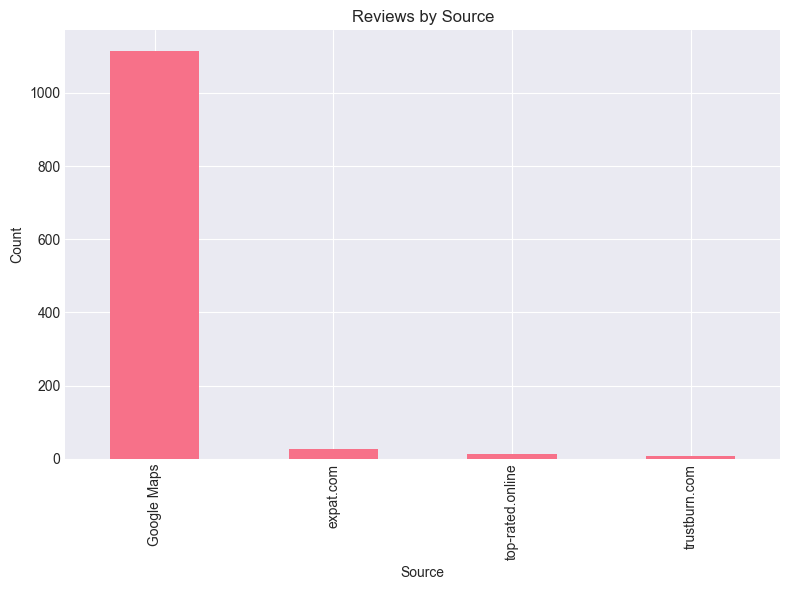

In [41]:
print("SOURCE DISTRIBUTION")

source_counts = df['source'].value_counts()
source_percent = (source_counts / len(df)) * 100

for source, count in source_counts.items():
    percent = source_percent[source]
    print(f"{source:20} {count:5} reviews ({percent:.1f}%)")

# Visualize
plt.figure(figsize=(8, 6))
source_counts.plot(kind='bar')
plt.title('Reviews by Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


### 6. Rating Analysis

RATING ANALYSIS
Reviews with ratings:    1,124 (96.5%)
Reviews without ratings: 41 (3.5%)

Rating Statistics:
  Average: 4.03/5
  Minimum: 1/5
  Maximum: 5/5

Rating Distribution:
  1/5:  120 reviews (10.7%)
  2/5:   66 reviews (5.9%)
  3/5:   90 reviews (8.0%)
  4/5:  232 reviews (20.6%)
  5/5:  616 reviews (54.8%)


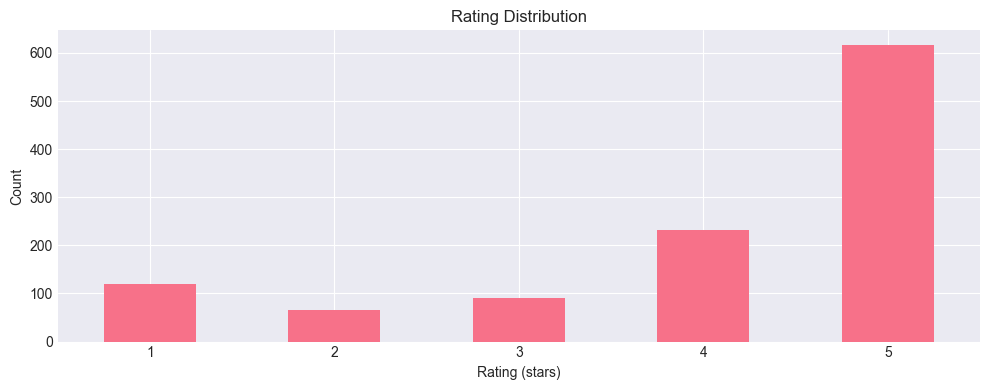

In [42]:
print("RATING ANALYSIS")

# Count reviews with/without ratings
with_rating = df[df['rating'] > 0]
without_rating = df[df['rating'] == 0]

print(f"Reviews with ratings:    {len(with_rating):,} ({(len(with_rating)/len(df)*100):.1f}%)")
print(f"Reviews without ratings: {len(without_rating):,} ({(len(without_rating)/len(df)*100):.1f}%)")

if len(with_rating) > 0:
    print(f"\nRating Statistics:")
    print(f"  Average: {with_rating['rating'].mean():.2f}/5")
    print(f"  Minimum: {with_rating['rating'].min()}/5")
    print(f"  Maximum: {with_rating['rating'].max()}/5")
    
    # Distribution
    rating_dist = with_rating['rating'].value_counts().sort_index()
    print(f"\nRating Distribution:")
    for rating, count in rating_dist.items():
        percent = (count / len(with_rating)) * 100
        print(f"  {rating}/5: {count:4} reviews ({percent:.1f}%)")
    
    # Visualize
    plt.figure(figsize=(10, 4))
    rating_dist.plot(kind='bar')
    plt.title('Rating Distribution')
    plt.xlabel('Rating (stars)')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

### 7. Location Analysis

In [43]:
print("LOCATION ANALYSIS")

location_counts = df['location'].value_counts()

print(f"Total unique locations: {len(location_counts)}")
print(f"\nTop 10 locations:")
for i, (location, count) in enumerate(location_counts.head(10).items(), 1):
    percent = (count / len(df)) * 100
    print(f"{i:2}. {location[:40]:40} {count:4} reviews ({percent:.1f}%)")

LOCATION ANALYSIS
Total unique locations: 12

Top 10 locations:
 1. California Gym Centre Urbain Nord         373 reviews (32.0%)
 2. California Gym Mall                       106 reviews (9.1%)
 3. California Gym Bardo                      102 reviews (8.8%)
 4. California Gym Strength La Marsa          101 reviews (8.7%)
 5. California Gym Boumhel                     89 reviews (7.6%)
 6. California Gym Soukra                      88 reviews (7.6%)
 7. California Gym Zephyr                      85 reviews (7.3%)
 8. California Gym Sousse                      59 reviews (5.1%)
 9. California Gym Platinum                    56 reviews (4.8%)
10. California Gym Lac 1                       45 reviews (3.9%)


### 8. Date Analysis

DATE ANALYSIS
Dates NOT matching DD-MM-YYYY format:
[nan '07 Mai 2012 13:51:08' '07 Mai 2012 13:58:18' '07 Mai 2012 14:24:43'
 '07 Mai 2012 14:29:50' '07 Mai 2012 14:44:07' '07 Mai 2012 16:07:12'
 '07 Mai 2012 17:29:07' '07 Mai 2012 17:35:31' '07 Mai 2012 17:36:58'
 '17 Mai 2012 14:42:38' '17 Mai 2012 17:23:34' '17 Mai 2012 17:29:14'
 '17 Mai 2012 20:23:51' '18 Mai 2012 10:58:09' '22 Mai 2012 07:55:11'
 '22 Mai 2012 09:04:02' '28 Mai 2012 11:39:35' '05 Juin 2012 08:58:35'
 '05 Juin 2012 10:55:07' '14 Juin 2012 11:55:39' '08 Août 2012 12:41:03'
 '08 Août 2012 16:19:57' '23 Mai 2013 22:58:50' '03 Août 2013 12:32:29'
 '04 Août 2013 13:41:44' '04 Août 2013 17:39:26' '05 Août 2013 11:59:08']
Count: 28
DATE RANGE ANALYSIS
Recent (< 3 years): 607 reviews
Old (> 5 years): 348 reviews
Middle (3–5 years): 182 reviews
Dominant date range:
count                             1137
mean     2022-11-02 13:09:01.424802048
min                2012-12-04 00:00:00
25%                2020-12-02 00:00:00
50% 

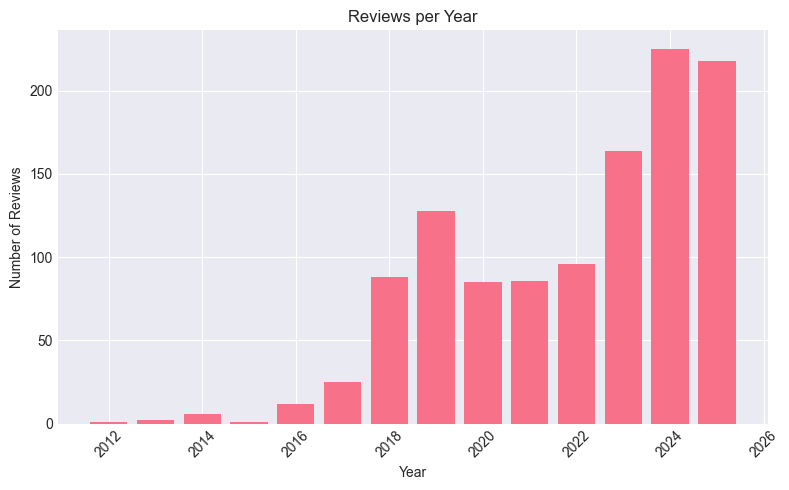

In [56]:
print("DATE ANALYSIS")

# Show dates that do NOT match the pattern
non_exact_dates = df[~df['date'].astype(str).str.match(r'\d{1,2}-\d{1,2}-\d{4}')]
print("Dates NOT matching DD-MM-YYYY format:")
print(non_exact_dates['date'].unique())
print(f"Count: {len(non_exact_dates)}")


df['date_parsed'] = pd.to_datetime(df['date'], format="%d-%m-%Y", errors='coerce')

today = datetime.today()

# thresholds
three_years_ago = today - timedelta(days=3*365)
five_years_ago  = today - timedelta(days=5*365)

# counts
recent = df[df['date_parsed'] >= three_years_ago]
old    = df[df['date_parsed'] <= five_years_ago]
middle = df[(df['date_parsed'] < three_years_ago) & (df['date_parsed'] > five_years_ago)]

print("DATE RANGE ANALYSIS")
print(f"Recent (< 3 years): {len(recent)} reviews")
print(f"Old (> 5 years): {len(old)} reviews")
print(f"Middle (3–5 years): {len(middle)} reviews")
print("Dominant date range:")
print(df['date_parsed'].describe())

# Extract the year from parsed dates
df['year'] = df['date_parsed'].dt.year

# Count reviews by year
reviews_per_year = df['year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
plt.bar(reviews_per_year.index, reviews_per_year.values)
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.title("Reviews per Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### 9. Text Length Analysis

TEXT LENGTH
Average words per comment: 12.3
Shortest comment: 1 words
Longest comment: 297 words
Missing comments: 605

Short comments (≤3 words): 721 (61.9%)
Examples of short comments:
  • bon service
  • Très belle expérience
  • Le meilleur centre
  • Très Bien
  • Très bon service


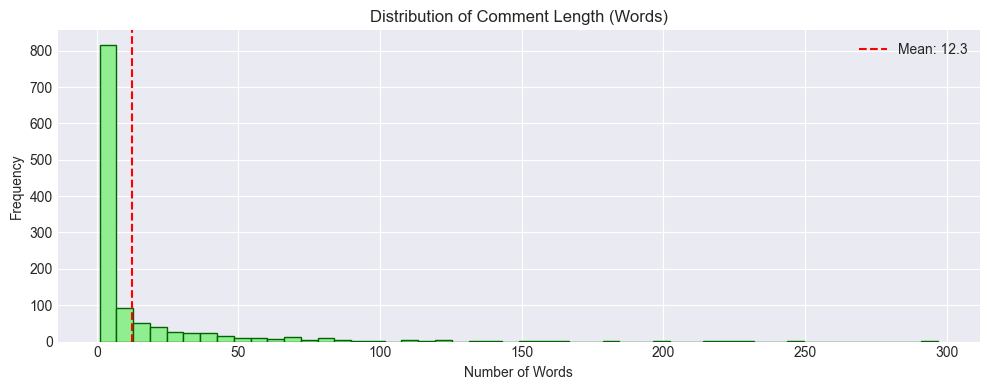

In [67]:
print("TEXT LENGTH")

# Calculate text length
df['word_count'] = df['comment'].apply(lambda x: len(str(x).split()))

print(f"Average words per comment: {df['word_count'].mean():.1f}")
print(f"Shortest comment: {df['word_count'].min()} words")
print(f"Longest comment: {df['word_count'].max()} words")

missing_comments = df['comment'].isna().sum()
print(f"Missing comments: {missing_comments}")

# Short comments analysis
short_comments = df[df['word_count'] <= 3]
print(f"\nShort comments (≤3 words): {len(short_comments):,} ({(len(short_comments)/len(df)*100):.1f}%)")

if len(short_comments) > 0:
    print("Examples of short comments:")
    for comment in short_comments['comment'].head(5):
        print(f"  • {comment}")

# Visualize word count distribution
plt.figure(figsize=(10, 4))
plt.hist(df['word_count'], bins=50, color='lightgreen', edgecolor='darkgreen')
plt.title('Distribution of Comment Length (Words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.axvline(df['word_count'].mean(), color='red', linestyle='--', label=f'Mean: {df["word_count"].mean():.1f}')
plt.legend()
plt.tight_layout()
plt.show()

### 10. Summary Statistics

In [68]:
print("📈 SUMMARY STATISTICS")

# Calculate duplicate IDs (if not already calculated)
duplicate_ids = df.duplicated(subset=['id']).sum()
summary_data = {
    'Metric': [
        'Total Reviews',
        'Sources',
        'Unique Locations',
        'Reviews with Ratings',
        'Reviews without Ratings',
        'Average Rating',
        'Average Comment Length',
        'Short Comments (≤3 words)',
        'Missing Values',
        'Duplicate IDs'
    ],
    'Value': [
        f"{len(df):,}",
        f"{df['source'].nunique()}",
        f"{df['location'].nunique()}",
        f"{len(with_rating):,} ({(len(with_rating)/len(df)*100):.1f}%)",
        f"{len(without_rating):,} ({(len(without_rating)/len(df)*100):.1f}%)",
        f"{with_rating['rating'].mean():.2f}/5" if len(with_rating) > 0 else "N/A",
        f"{df['word_count'].mean():.1f} words",
        f"{len(short_comments):,} ({(len(short_comments)/len(df)*100):.1f}%)",
        f"{missing.sum():,}",
        f"{duplicate_ids:,} ({(duplicate_ids/len(df)*100):.1f}%)"
    ]
}

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

📈 SUMMARY STATISTICS
                   Metric         Value
            Total Reviews         1,165
                  Sources             4
         Unique Locations            12
     Reviews with Ratings 1,124 (96.5%)
  Reviews without Ratings     41 (3.5%)
           Average Rating        4.03/5
   Average Comment Length    12.3 words
Short Comments (≤3 words)   721 (61.9%)
           Missing Values           606
            Duplicate IDs      0 (0.0%)
